In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [163]:
dataset = pd.read_csv('/home/h4rzor/Courses/Deep Learning/Zadachi/Artificial_Neural_Networks/Churn_Modelling.csv')

In [164]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [165]:
#As we can see here, we can get rid off of the followin columns:"RowNumber","CustomerId","Surname" as they are not really relevant in our dataset of features.

In [166]:
dropped = ["RowNumber","CustomerId","Surname"]

In [167]:
dataset = dataset.drop(dropped,axis=1)

In [168]:
dataset #We are left with the independent features: columns from "CreditScore" all the way to "EstimatedSalary" 
               #and one dependent feature column that is "Exited". Our goal for this dataset is to figure out a way for predicting
               #whether the customer will exit the bank based on all the relevant columns in the dataset. 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [169]:
 #first we need to make sure that there are no "NaN" values in the columns
counter = 0
for i in dataset.columns:
    if not dataset[i].isna().any():
        counter += 1
        if counter == dataset.shape[1]:
            print('all are fine')
#As we can see, we do not have to replace NaN values, because the dataset does not have any

all are fine


In [170]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(0, 0.5, 'estimated_salary')

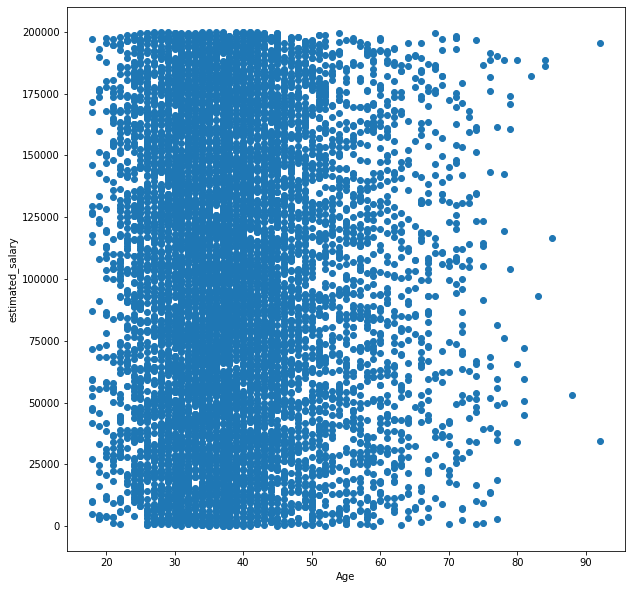

In [171]:
plt.figure(figsize=(10,10))
plt.scatter(dataset['Age'],dataset['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('estimated_salary')
#as we can see from this figure, there is a correlation between Age and EstimatedSalary, many values are in the 25-50 region

Text(0, 0.5, 'Balance')

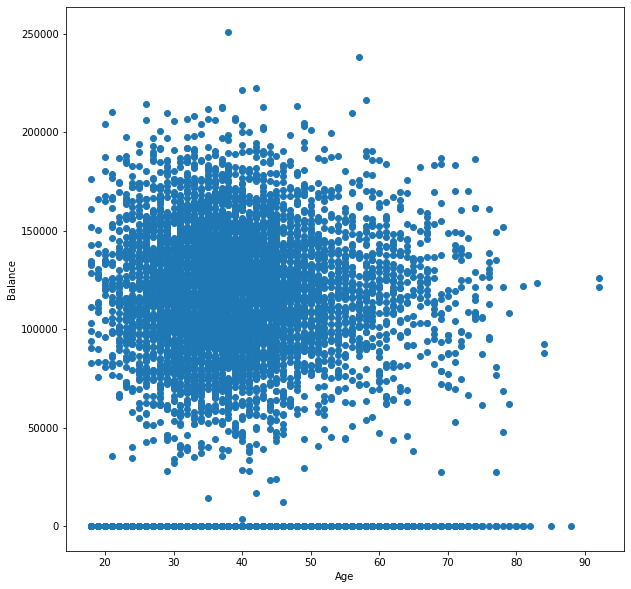

In [172]:
plt.figure(figsize=(10,10))
plt.scatter(dataset['Age'],dataset['Balance'])
plt.xlabel('Age')
plt.ylabel('Balance')
#There is a correlation here also,the younger and willing to work the person is, the more he has in Balance column

Text(0, 0.5, 'age')

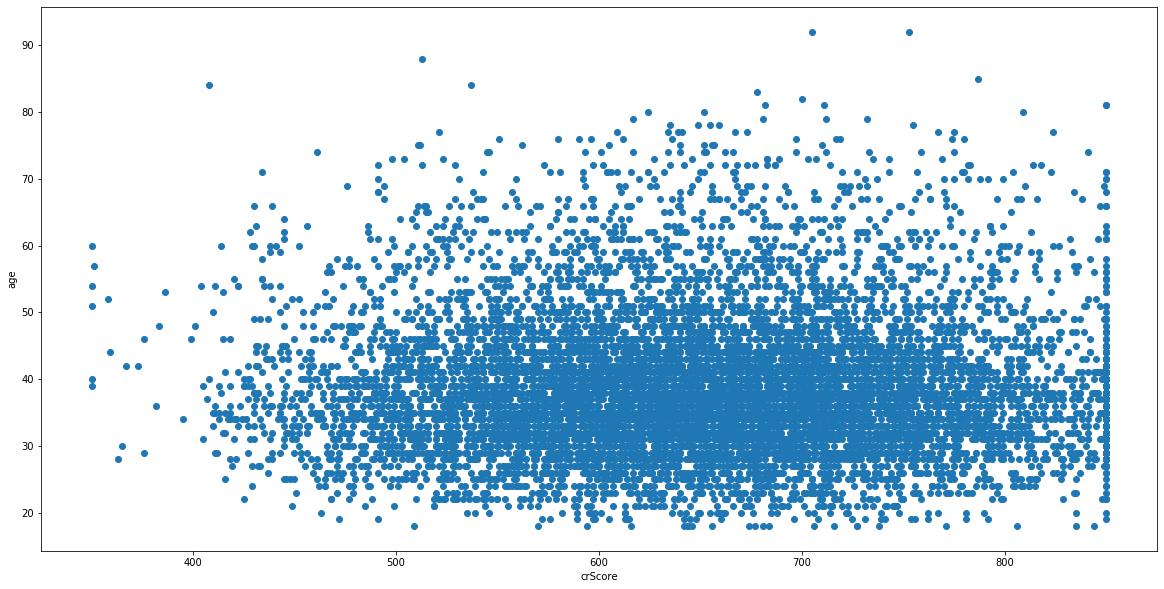

In [173]:
plt.figure(figsize=(20,10))
plt.scatter(dataset['CreditScore'],dataset['Age'])
plt.xlabel('crScore')
plt.ylabel('age')
#Most of them are in between 50 and 20 years old, so we will conclude that CreditScore column has to bring some correlation in the overall equation

In [174]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [175]:
#As we can see there are two categorical columns is the dataset.Some algorithms(most of them) do not work with
#such type of columns. We have to encode them in a way that algorithms prefer. For this case, I think OneHotEncoder 
#or LabelEncoder will do the work just fine
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [176]:
gender = encoder.fit_transform(dataset['Gender']) #This line of code transform Male and Female into 0 and 1. That way the alogirithm
                                                                                           #can take into account the formerly categorical column

In [177]:
dataset = dataset.drop('Gender',axis=1) #Dropping the categorical column from dataset

In [178]:
dataset['Gender'] = gender #Creeating a new column gender with the new 0 and 1 values

In [179]:
dataset

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0,1
9996,516,France,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,France,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1,1


In [180]:
#There is still one categorical column that we need to encode in order algorithms to work,this time I am going to do some mapping


In [181]:
dataset['Geography'].unique() #There are three unique values for Geography column

array(['France', 'Spain', 'Germany'], dtype=object)

In [182]:
mapping = {'France':0,"Spain":1,'Germany':2}
country = dataset['Geography'].map(mapping) #map the value to the country

In [183]:
dataset.drop('Geography',axis='columns',inplace=True)

In [184]:
dataset['Geography'] = country

In [185]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender,Geography
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2


In [186]:
#As we can see, the dataset is slowly converging to the best way possible for best results. But still there is some work to be done
#There are no more categorical columns, but the different numerical columns differ in tens or in other cases thousands
#We need to scale them in order for the algorithms to converge or at least work faster.
#I am not going to scaler columns with binary values or the one with Geography.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [187]:
dataset['CreditScore'] = scaler.fit_transform(np.reshape(dataset['CreditScore'].values,(-1,1)))
#We use the StandardScaler class to scale the values. We have to reshape before fit_transform because fit_transform
#accepts only one dimensional data. (-1,1) is where the new shape of the data

In [188]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender,Geography
0,-0.326221,42,2,0.00,1,1,1,101348.88,1,0,0
1,-0.440036,41,1,83807.86,1,0,1,112542.58,0,0,1
2,-1.536794,42,8,159660.80,3,1,0,113931.57,1,0,0
3,0.501521,39,1,0.00,2,0,0,93826.63,0,0,0
4,2.063884,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,39,5,0.00,2,1,0,96270.64,0,1,0
9996,-1.391939,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,0.604988,36,7,0.00,1,0,1,42085.58,1,0,0
9998,1.256835,42,3,75075.31,2,1,0,92888.52,1,1,2


In [189]:
dataset['Age'] = scaler.fit_transform(np.reshape(dataset['Age'].values,(-1,1)))
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender,Geography
0,-0.326221,0.293517,2,0.00,1,1,1,101348.88,1,0,0
1,-0.440036,0.198164,1,83807.86,1,0,1,112542.58,0,0,1
2,-1.536794,0.293517,8,159660.80,3,1,0,113931.57,1,0,0
3,0.501521,0.007457,1,0.00,2,0,0,93826.63,0,0,0
4,2.063884,0.388871,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,5,0.00,2,1,0,96270.64,0,1,0
9996,-1.391939,-0.373958,10,57369.61,1,1,1,101699.77,0,1,0
9997,0.604988,-0.278604,7,0.00,1,0,1,42085.58,1,0,0
9998,1.256835,0.293517,3,75075.31,2,1,0,92888.52,1,1,2


In [191]:
dataset['Tenure'] = scaler.fit_transform(np.reshape(dataset['Tenure'].values,(-1,1)))

In [192]:
dataset['Balance'] = scaler.fit_transform(np.reshape(dataset['Balance'].values,(-1,1)))

In [193]:
dataset['EstimatedSalary'] = scaler.fit_transform(np.reshape(dataset['EstimatedSalary'].values,(-1,1)))

In [195]:
dataset #In the prevoius cells I just scaled the data one column at a time. Just so to see how the data is changing
               #You could see that the data is scaled appropriately and is almost ready for algorithm to take place
               #As I do not have any separate test set, I need to train and test on this dataset,so I am going to 
               #split the data 5:1(80%:20%)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender,Geography
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,0,0
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,0,0
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,2,1,0,-0.066419,0,1,0
9996,-1.391939,-0.373958,1.724464,-0.306379,1,1,1,0.027988,0,1,0
9997,0.604988,-0.278604,0.687130,-1.225848,1,0,1,-1.008643,1,0,0
9998,1.256835,0.293517,-0.695982,-0.022608,2,1,0,-0.125231,1,1,2


In [370]:
from sklearn.model_selection import train_test_split #Allows me to split the data in a train and test set

In [371]:
y = dataset['Exited'] #This is our dependant variable

In [372]:
X = dataset.drop('Exited',axis=1) #This is our independant variables

In [373]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) #X_train and X_test contain all the independant variables and y_train 
                                                                                                                    #and y_test contain only the dependant variable('Exited' columns)

In [353]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression()
polynomial_regression = LogisticRegression()
#We import the Linear_Regression model, and then we make an instance of the class

In [354]:
lin_reg = linear.fit(X_train,y_train) #Here, the algorithm learned the correlations between the data

In [355]:
y_pred = lin_reg.predict(X_test) #Here, we could even plot the data, but at this time the score function will bie fine

In [356]:
lin_reg.score(X_test,y_test) #Even though LR is a simple algorithm, it is doing a good job for this dataset

0.8085

In [357]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
#We import the PolynomialFeatures and the argument 'degree' adds a new column with the data to 2,3 or more degree

In [358]:
polynomial_features_train = poly.fit_transform(X_train) #We transform the X_train set to add the additional independant column to it

In [359]:
polynomial = polynomial_regression.fit(polynomial_features_train,y_train) #We fit the model with already transormed X_train(polynomial_fetures_train)


/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [360]:
X_test = poly.transform(X_test)#We have to transform the X_test also

In [361]:
y_pred = polynomial.predict(X_test) #We could plot or play with these values,but it is enough to evaluate with score for now

In [363]:
polynomial.score(X_test,y_test) #We get a pretty good result. This model does better when the data is not linearly separable

0.8535

In [376]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svc = SVC(kernel='rbf')
#First we import SVC, and then import something different to evaluate the model : confusion_matrix

In [377]:
support = svc.fit(X_train,y_train) #Fits the data to the model

In [378]:
y_pred = svc.predict(X_test) #Making predictions based on the learned correlations

In [380]:
cm = confusion_matrix(y_test,y_pred) #Making an instance of the confusion_matrix

In [381]:
cm # As we can see there are (1555 + 168) right and (245 + 32) wrongly assigned values

array([[1555,   32],
       [ 245,  168]])

In [383]:
svc.score(X_test,y_test) #This model scored the best result so far, but we could all tweak them a little in order to get 
                                            #a better result

0.8615

In [391]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
#This is our 4th algorithm. It is a simple algorithm that divides the dataset into binary outcome.
#For example: Is the client older than 30? Yes or No? In that case the algorithm divides into two parts called leaves

In [392]:
tree_clasiffier = tree.fit(X_train,y_train)

In [390]:
tree.score(X_test,y_test)

0.787

In [408]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200)
#It is like the movie Inception except it is with multiple trees and multiple leaves in them.Splits the dataset into
#smaller parts in order to get some correlataion from the data

In [403]:
forest_classifier = forest.fit(X_train,y_train) #Fits the data to classifier

In [404]:
y_pred = forest.predict(X_test) #Predict the outcome

In [405]:
forest_cm = confusion_matrix(y_test,y_pred) #Confusion matrix

In [406]:
forest_cm #Result from confusion_matrix

array([[1520,   67],
       [ 194,  219]])

In [407]:
forest.score(X_test,y_test) #It is the best one yet,but we can tweak others in order to achieve better results

0.8695